# Скорость сходимости метода ньютона
## Постановка задачи
Применить метод Ньютона scipy.optimize.newton к решению каждого из уравнений $(x-1)^{2}=0$. и $e^{2x}-2e^{x}+1=0$. Показать экспериментально(построить график зависимости ошибки от номера шага), что итерации сходятся линейно, а не квадратично. Попробовать доказать это теоретически.

## Уравнение первое

0.00018628596589276292


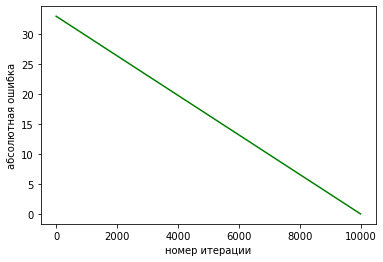

In [23]:
import numpy as np 
from scipy import optimize 
import matplotlib.pyplot as plt 

def f(x): 
    return (x-1)**2 
x=[] 
iteration_range=np.arange(1, 10000, 1)  #список количества итераций для пакета scipy.optimize.newton
for i in iteration_range: 
    root=optimize.newton(f, 100, maxiter=i, disp=0, tol=0.001, fprime=lambda x: 2*x-2, fprime2=lambda x: 2)
    # 100-начальное приближение
    # f-сама функция, maxiter-ключ, по которому выбирается количество итераций в методе Ньютона,
    # disp-монитор ошибки лучше ставить ложь, tol-допустимая погрешность нулевого значения, 
    # дальше соответственно можно дополнительно указать первую и вторую производную функции,
    # дабы не использовать метод секущих и ускорить вычисления
    root=root-1   #заранее посчитаем корень уравнения и будем его вычитать из ответа, дабы найти расхождение
    x.append(root) 
y=np.linspace(x[0], x[len(x)-1], num =len(x))
plt.plot(iteration_range, y, 'g')
#После этого строим график, по нему видно, что итерации сходятся линейно.
plt.xlabel('номер итерации')
plt.ylabel('абсолютная ошибка')
print(min(x))
pass

Мы видим, что с каждой итерацией приращение ошибки происходит по линейному закону, что и требовалось доказать, в пакете scipy.optimize.newton можно также выставлять тот предел погрешности при котором стоит остановить итерационный процесс.

В строчке ниже можно попробовать поварьировать разными параметрами дабы понять как работает метод optimize.newton.

In [54]:
def f(x): 
    return (x-1)**2 
r=optimize.newton(f, 100, maxiter=10, disp=0, fprime=lambda x: 2*x-2, fprime2=lambda x: 2)
print(r)

1.0016765736930346


## Уравнение второе

0.00018628596589276292


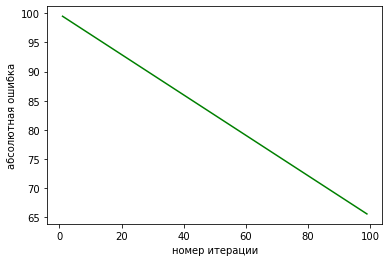

In [66]:
import numpy as np 
from scipy import optimize 
import matplotlib.pyplot as plt 

def f1(x): 
    return pow(math.exp(1),2*x)-2*pow(math.exp(1),x)+1
x1=[] 
iteration_range=np.arange(1, 100, 1)  #список количества итераций для пакета scipy.optimize.newton
for i in iteration_range: 
    root=optimize.newton(f1, 100, maxiter=i, disp=0)
    # 100-начальное приближение
    # f1-сама функция, maxiter-ключ, по которому выбирается количество итераций в методе Ньютона
    # disp-монитор ошибки лучше ставить ложь, tol-допустимая погрешность нулевого значения
    # root=root-1   # корень не нужно вычитать, так как он равен нулю
    x1.append(root) 
y=np.linspace(x1[0], x1[len(x1)-1], num =len(x1))
plt.plot(iteration_range, y, 'g')
#После этого строим график, по нему видно, что итерации сходятся линейно.
plt.xlabel('номер итерации')
plt.ylabel('абсолютная ошибка')
print(min(x))
pass

Видим, что ошибка также спадает линейным образом.

## Теоретическое обоснование

Экспериментально мы доказали, что итерации сходятся в обоих этих уравнениях сходятся линейно, а не квадратично. Теперь попробуем доказать это теоретически.

Теорема о сходимости метода Ньютона
Пусть корень уравнения f(x) = 0 отделен на отрезке $[a;b]$ (функция f(x) непрерывна на $[a;b]$ и на концах его принимает разные знаки), а производные $f'(x)$ и $f''(x)$ отличны от нуля и сохраняют постоянные знаки на $[a;b]$. Тогда, если выбрать начальное приближение х0 $[a;b]$ так, чтобы $f'(x0) ∙ f''(x0) $>$ 0$, то последовательность приближений, определяемая формулой$$
x_{n}=x_{n-1}-\frac{f(x_{n-1})}{f'(x_{n-1})}
$$сходится. Вычислим скорость сходимости для каждого их уравнений$$(x-1)^{2}=0$$и$$e^{2x}-2e^{x}+1=0$$Скорость сходимости-степень приближения к точному решению на каждой итерации.
## Для первого уравнения:
$$f(x)=(x-1)^{2}$$
$$f'(x)=2x-2$$
$$x-\frac{f(x)}{f'(x)}=x-\frac{(x-1)^{2}}{(2x-2)}=\frac{(x-1)}{2}$$
Эта функция линейна, а значит и итерации сходятся линейно.

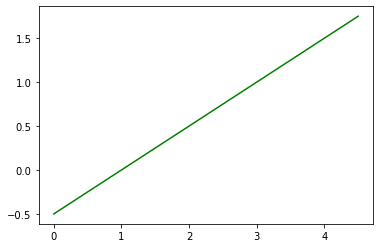

In [78]:
import numpy as np 
import math
import matplotlib.pyplot as plt
%matplotlib inline

y=[]
x=np.arange(0,5,0.5)
def f(x): 
    return (x-1)/2 
for x1 in x:
    y.append(f(x1))

plt.plot(x,y,'g')  
pass

## Для второго уравненя:
$$f(x)=e^{2x}-2e^{x}+1$$
$$f'(x)=2e^{2x}-2e^{x}$$
$$x-\frac{f(x)}{f'(x)}=x-\frac{(e^{2x}-2e^{x}+1)}{(2e^{2x}-2e^{x})}=x+0.5\frac{1}{e^{x}}-\frac{1}{2}$$
По графику видно, что функция сходимости линейна в интервале {0,${\infty}$}

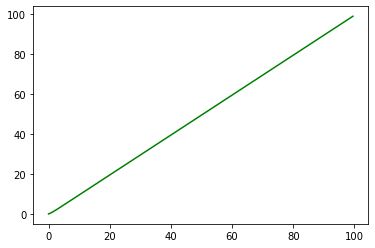

In [77]:
import numpy as np 
import math
import matplotlib.pyplot as plt
%matplotlib inline

y=[]
x=np.arange(0,100,0.5)
def f(x): 
    return x+0.5*pow(math.exp(1),-x)-0.5
for x1 in x:
    y.append(f(x1))

plt.plot(x,y,'g')    
pass

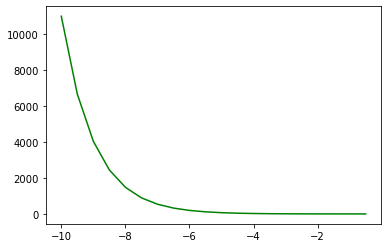

In [76]:
import numpy as np 
import math
import matplotlib.pyplot as plt
%matplotlib inline

y=[]
x=np.arange(-10,0,0.5)
def f(x): 
    return x+0.5*pow(math.exp(1),-x)-0.5
for x1 in x:
    y.append(f(x1))

plt.plot(x,y,'g')    
pass

## Вывод
Доказали теоретически и экспериментально, что ошибка с номером итерации в первом и во втором случае сходятся линейно, но во втором случае с некоторыми оговорками по области значений функции.